# LDDS

# Tutorial 9: User-defined discrete maps

In [Tutorial 8](tutorial-8.ipynb) we learnt how to set up LDDS for the computation of LDs of discrete systems, whose dynamics is described by iterative maps. We showed examples with well-known maps defined by default by LDDS in `ldds.discrete_maps`. 

Now, in this tutorial we will show how users can define their own discrete maps.

## An simple example: The Gaussian map

All the iterative maps in `ldds.discrete_maps` are simply Python functions defined as time-dependent 2D maps. Currently, LDDS only considers 2D maps for computation of LDs.

Any new iterative map must have the same structure.

We illustrate how to construct a new map function for *the Gaussian map*, which has the form

\begin{align*}
    x_{i+1} = exp(-\alpha x_i^2) + \beta \\
    y_{i+1} = exp(-\alpha y_i^2) + \beta
\end{align*}

with $\alpha, \beta$ constant parameters.

The construction of the map is shown below. 

> **NOTE** that the time-dependent variable must be added to the map. We take the `time_step` as equal to $1$ by default.

In [1]:
import numpy as np

def GaussianMap(t_initial, u_initial, PARAMETERS=[4.90, -0.58, 1]):
    """Gaussian map"""
    x_initial, y_initial = u_initial.T
    # Map parameters (CHANGE ONLY THIS FOR YOUR OWN MAP)
    alpha, beta, time_step = PARAMETERS 
    
    # Map components (CHANGE ONLY THIS FOR YOUR OWN MAP)
    t_next = t_initial + time_step
    x_next = np.exp(-alpha*x_initial**2) + beta
    y_next = np.exp(-alpha*y_initial**2) + beta
    
    # Map next iteration
    u_next = np.column_stack([ x_next, y_next])
    
    return t_next, u_next

In [2]:
discrete_map = GaussianMap

THEN, the computation just proceeds as for any other iterative map as seen in Tutorial 8.

In [3]:
import os, sys
sys.path.insert(1, os.pardir)

from ldds.base_discrete import compute_lagrangian_descriptor
from ldds.tools import draw_all_lds

In [4]:
p_value = 1/2

N_iterations = 100

x_min, x_max, Nx = [-1, 1, 1000]
y_min, y_max, Ny = [-1, 1, 1000]

In [5]:
grid_parameters = [[x_min, x_max, Nx],[y_min, y_max, Ny]]

In [6]:
f = discrete_map
LD_forward = compute_lagrangian_descriptor(grid_parameters, f, N_iterations, p_value)

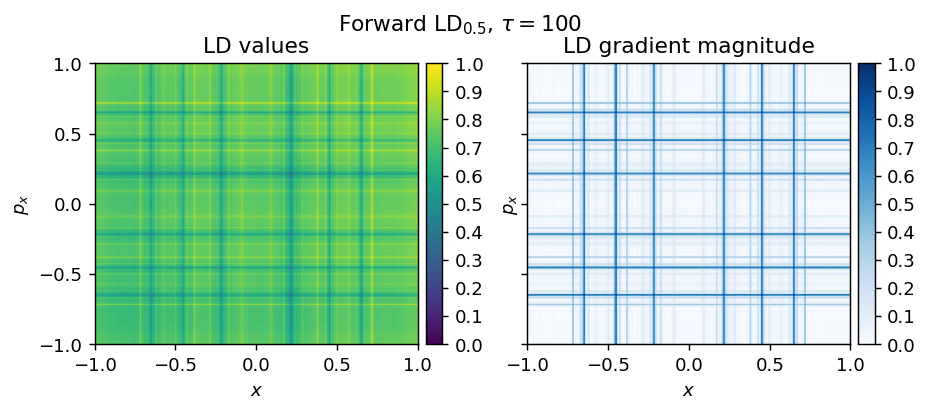

In [7]:
fig = draw_all_lds(LD_forward, [], grid_parameters, N_iterations, p_value, interactive=False)

> **NOTE** Not all discrete maps are reversible, like in the case of the Gaussian map. But, you can at least still compute the LD associated to the forward dynamics. 

## An extra example: Gingerbreadman map

Defining your own map is a really easy process, BUT the structure that it requires must be respected so that LDDS compute LDs without any error. 

Here, we just give another example so that you can play with its parameters, and reinforce the structure that usder-defined maps require. 

In [9]:
import numpy as np

def GingerbreadmanMap(t_initial, u_initial, PARAMETERS=[1]):
    """Gingerbreadman map"""
    x_initial, y_initial = u_initial.T
    # Map parameters
    time_step = PARAMETERS[0]
    
    # Map components
    t_next  = t_initial + time_step
    x_next = 1 - y_initial + np.abs(x_initial)
    y_next = x_initial
    
    # Map next iteration
    u_next = np.column_stack([ x_next, y_next])
    
    return t_next, u_next

In [10]:
discrete_map = GingerbreadmanMap

In [11]:
p_value = 1/2

N_iterations = 100

x_min, x_max, Nx = [-10, 10, 1000]
y_min, y_max, Ny = [-10, 10, 1000]

In [12]:
grid_parameters = [[x_min, x_max, Nx],[y_min, y_max, Ny]]

In [13]:
f = discrete_map
LD_forward = compute_lagrangian_descriptor(grid_parameters, f, N_iterations, p_value)

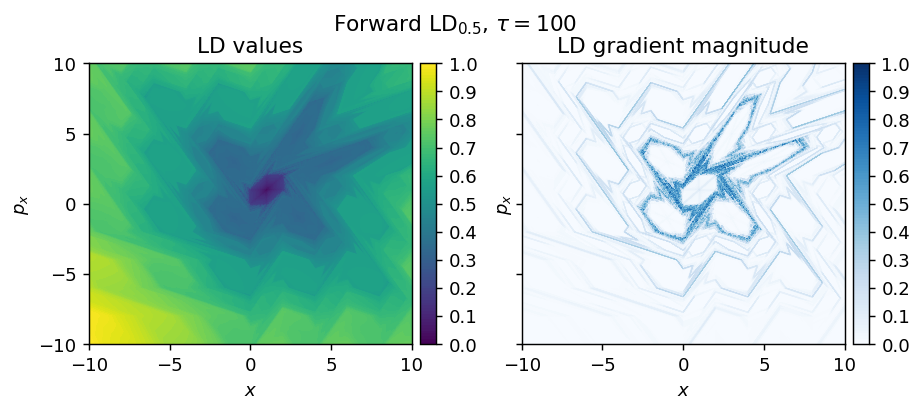

In [14]:
fig = draw_all_lds(LD_forward, [], grid_parameters, N_iterations, p_value, interactive=False)